In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import geopandas as gpd
import shapely.geometry

In [2]:
#Parameters

%matplotlib inline
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 40)


plt.rcParams["figure.figsize"] = (30, 15)

columns = ['operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses']

In [3]:
df = pd.read_csv("properatti.csv", usecols=columns)

In [4]:
df.head()

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,2646675.0,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,1129248.0,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN


# Analisis

*   Se comprueban nulos

In [5]:
df.value_counts()
df.isna().sum().sort_values()

operation                          0
property_type                      0
place_with_parent_names            0
country_name                       0
state_name                         0
place_name                        23
geonames_id                    18717
surface_covered_in_m2          19907
price_aprox_usd                20410
price_aprox_local_currency     20410
price                          20410
currency                       20411
price_per_m2                   33562
surface_total_in_m2            39328
lon                            51550
lat                            51550
lat-lon                        51550
price_usd_per_m2               52603
rooms                          73830
expenses                      106958
floor                         113321
dtype: int64

#  Limpieza

*   Se elimina columna "Unnamed: 0" por indice duplicado.
*   Se elimina "description", "tittle" sin uso actual.

In [6]:
#df_clean = df.drop(columns=["Unnamed: 0", "description", "tittle"]) 

# Geopandas

    

C:\Users\tomas\anaconda3\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\tomas\anaconda3\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\tomas\anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\tomas\anaconda3\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert t

<AxesSubplot:>

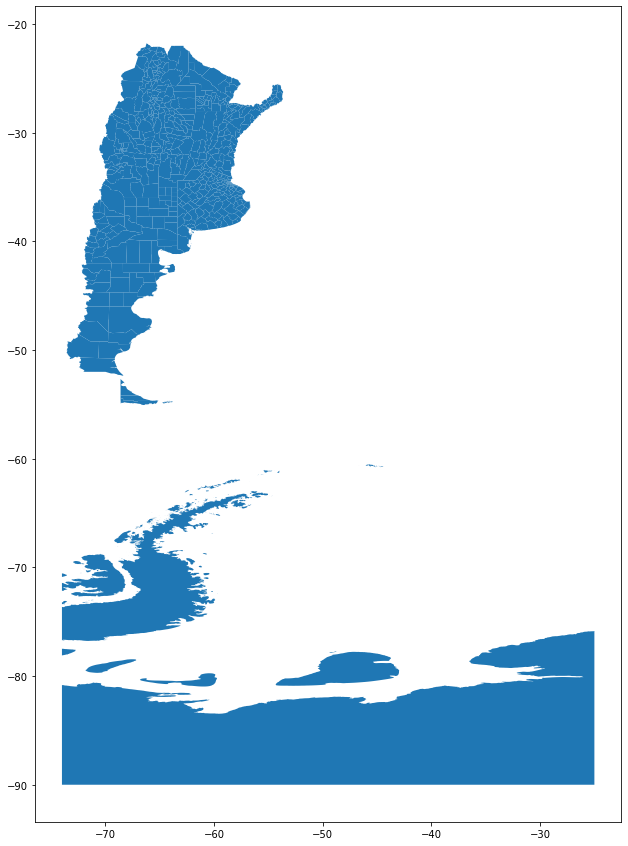

In [7]:
gdf = gpd.read_file("limites\json\departamento.json")
gdf = gdf[gdf.nam != "Islas del Atlántico Sur"]
gdf.plot()


In [8]:
geometry = [shapely.geometry.Point(xy) for xy in zip( df.lon, df.lat)]

In [9]:
geo_df = gpd.GeoDataFrame(df,geometry=geometry)

C:\Users\tomas\anaconda3\lib\site-packages\geopandas\geodataframe.py:35: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  out = from_shapely(data)


C:\Users\tomas\anaconda3\lib\site-packages\geopandas\plotting.py:493: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


IndexError: index out of range

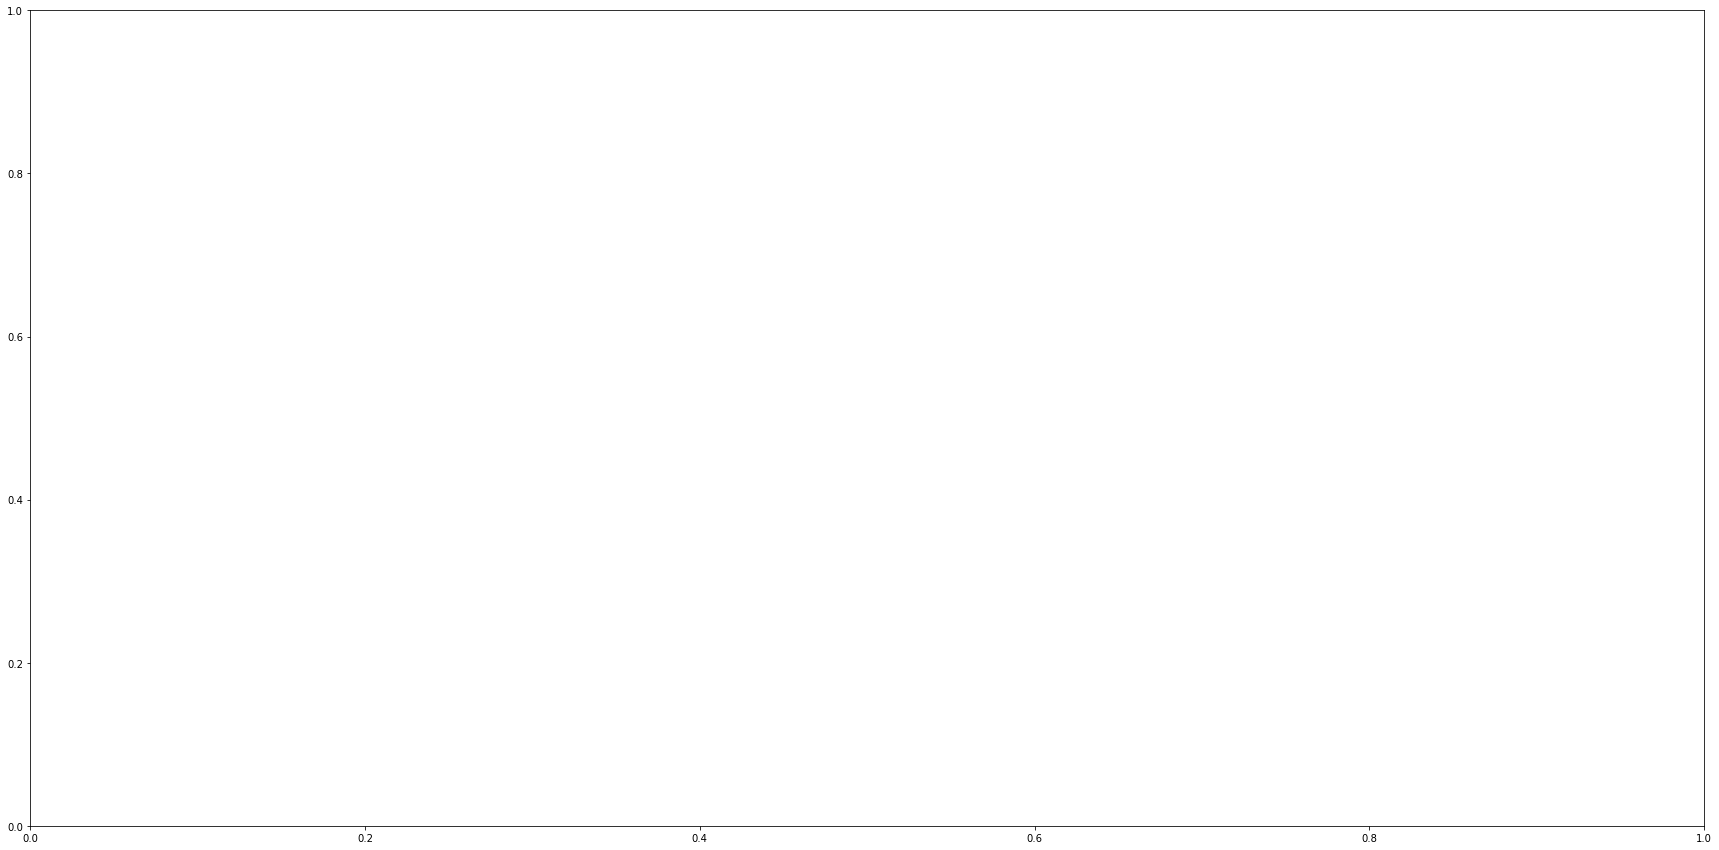

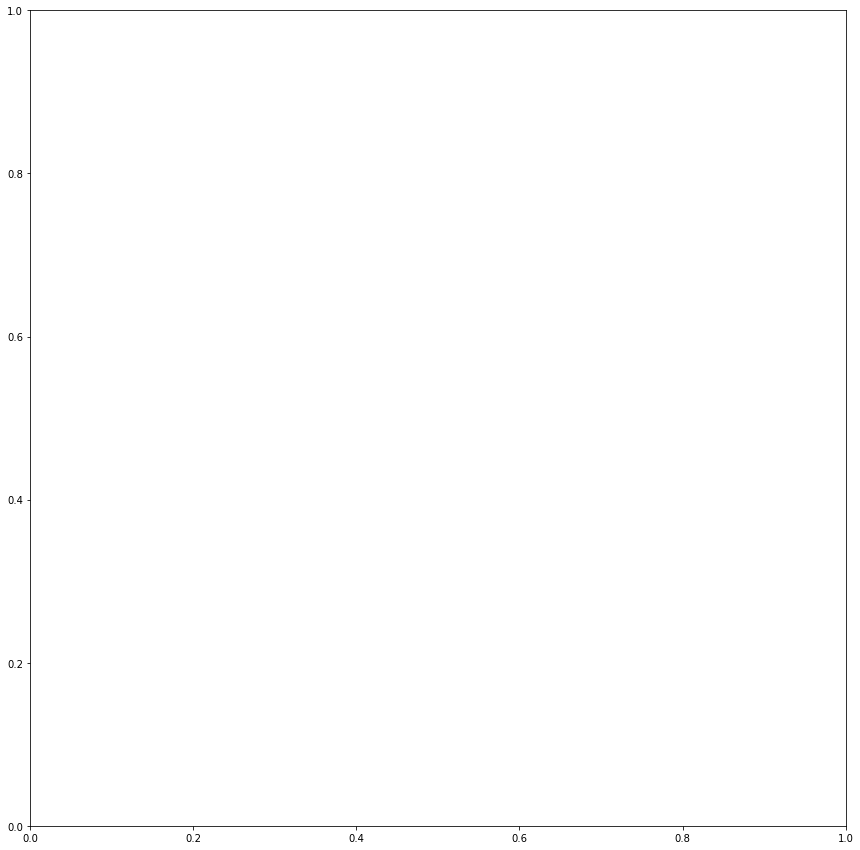

In [10]:
fig, ax = plt.subplots()
geo_df[geo_df.property_type == "apartment"].plot(ax, markersize=20,color="red")

In [ ]:
geo_df.columns